4. Neste exercício você irá implementar um classificador linear, utilizando o classificador naive Bayes, para realizar a detecção de símbolos QPSK. Os símbolos QPSK são dados pela figura e tabela abaixo. bits Símbolo (I + jQ)

O resultado do seu classificador (neste caso, um detector) pode ser comparado com a curva da taxa de erro de símbolo (SER) teórica, a qual é dada por SER = erfc (√ erfc . Es2N0 ) − 4/ 1 (√ Es 2N0 )2
Utilizando a classe GaussianNB do módulo naive_bayes da biblioteca sklearn, faça o seguinte
A. Construa um classificador linear, utilizando o classificador naive Bayes, para realizar a detecção dos símbolos QPSK.
a. Gere N = 1000000 símbolos QPSK aleatórios.
b. Passe os símbolos através de um canal AWGN. 
c. Detecte a probabilidade de erro de símbolo para cada um dos valores do vetor Es/N0 = [-2, 0, 2, 4, 6, 8, 10,12, 14, 16, 18, 20].
d. Você pode utilizar o template abaixo para criar seu código.
B. Apresente um gráfico comparando a SER simulada e a SER teórica versus os valores de Es/N0 definidos acima.
C. Podemos dizer que a curva simulada se aproxima da curva teórica da SER?
D. Se as classes, ou seja, os símbolos, tivessem probabilidades diferentes, nós poderíamos dizer que o classificador ML é equivalente ao MAP?
( Dica : Como os símbolos são representados por números complexos e a classe GaussianNB não suporta tal representação, você terá que instanciar 2 objetos da classe, um para cada componente do símbolo, ou seja, um classificador para a parte
real (i.e., In-phase - I) e outro para a parte imaginária (Quadrature - Q).
( Dica : A função erfc pode ser importada da seguinte forma: from scipy.special import erfc ).
( Dica : Uma rápida revisão sobre taxa de erro de símbolo pode ser encontrada no link:
http://www.dsplog.com/2007/11/06/symbol-error-rate-for-4-qam/ ).

In [17]:
# Template of a QPSK detection loop
# Import all necessary libraries.
import numpy as np
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Number of QPSK symbols to be transmitted.
N = 10000000

# Instantiate a Gaussian naive Bayes classifier for each one of the parts of a QPSKsymbol.
gnb_re = GaussianNB()
gnb_im = GaussianNB()

# Create Es/N0 vector.
EsN0dB = np.arange(-2,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):
    
    print('Es/N0 dB:', EsN0dB[idx])

    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N BPSK symbols.
    ip =(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0) + 1j*(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0)
    # Normalization of energy to 1.
    s = (1/np.sqrt(2))*ip;
    
    # Generate noise vector. 
    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
    # Pass symbols through AWGN channel.
    y = s + np.sqrt(EsN0Lin)*noise
    
    # Split array into random train and test subsets.
    ip_re_test, ip_re_train, y_re_test, y_re_train = train_test_split(ip.real, y.real, random_state=42)
    ip_im_test, ip_im_train, y_im_test, y_im_train = train_test_split(ip.imag, y.imag, random_state=42)
    
    # Fit models for real and imaginary parts.
    gnb_re.fit(y_re_train, ip_re_train.ravel())
    gnb_im.fit(y_im_train, ip_im_train.ravel())
    
    # Prediction for real part.
    detected_ip_re = gnb_re.predict(y_re_test)
    detected_ip_re = detected_ip_re.reshape(len(y_re_test), 1)
    # Prediction for imaginary part.
    detected_ip_im = gnb_im.predict(y_im_test)
    detected_ip_im = detected_ip_im.reshape(len(y_im_test), 1)    
        
    # Simulated QPSK BER.
    error_re = (ip_re_test != detected_ip_re)
    error_im = (ip_im_test != detected_ip_im)
    error = 0;
    for i in range(0, len(ip_re_test)): 
        if(error_re[i]==True or error_im[i]==True): 
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / len(ip_re_test)
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0;

Es/N0 dB: -2
Es/N0 dB: 0
Es/N0 dB: 2
Es/N0 dB: 4
Es/N0 dB: 6
Es/N0 dB: 8
Es/N0 dB: 10
Es/N0 dB: 12
Es/N0 dB: 14
Es/N0 dB: 16
Es/N0 dB: 18
Es/N0 dB: 20


In [18]:
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ser_simu[i]))

Es/N0:-2 	- BER: 3.815468e-01
Es/N0:0 	- BER: 2.921671e-01
Es/N0:2 	- BER: 1.974103e-01
Es/N0:4 	- BER: 1.100529e-01
Es/N0:6 	- BER: 4.540120e-02
Es/N0:8 	- BER: 1.198840e-02
Es/N0:10 	- BER: 1.583867e-03
Es/N0:12 	- BER: 6.866667e-05
Es/N0:14 	- BER: 4.000000e-07
Es/N0:16 	- BER: 0.000000e+00
Es/N0:18 	- BER: 0.000000e+00
Es/N0:20 	- BER: 0.000000e+00


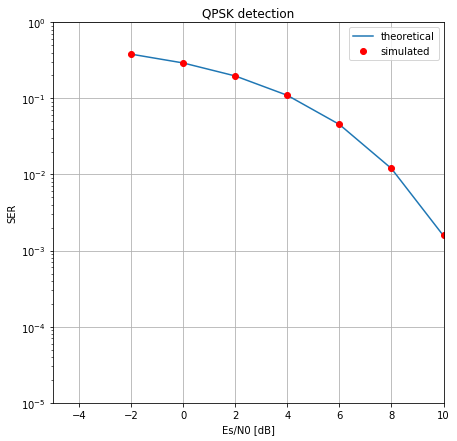

In [19]:
# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.grid(True)
plt.title('QPSK detection')
plt.legend()
plt.xlim([-5, 10])
plt.ylim([1e-5, 1])
plt.savefig("qpsk_ber_curves.png", dpi=600)
plt.show()

c. Sim, as curvas se assemelham.

d. Se os símbolos tivessem probabilidades diferentes não poderíamos afirmar que o classificador ML é equivalente ao MAP.